# Preliminary Exploration for Utility Circuits

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import box
import matplotlib.pyplot as plt
import glob
import os
import plotly.express as px
import folium

In [2]:
substations = pd.read_csv("../../../../capstone/electrigrid/data/utilities/Substations_2024.csv")
substations.columns = substations.columns.str.lower()
substations.head()

/tmp/ipykernel_1806934/715323543.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  substations = pd.read_csv("../../../../capstone/electrigrid/data/utilities/Substations_2024.csv")


,x,y,objectid,id,name,city,state,zip,type,status,...,source,sourcedate,val_method,val_date,lines,max_volt,min_volt,max_infer,min_infer,globalid
0,-91.864744,45.768423,1,107655,UNKNOWN107655,SHELL LAKE,WI,54871,SUBSTATION,IN SERVICE,...,http://psc.wi.gov/utilityinfo/maps/electricmap...,2014/04/07 00:00:00+00,IMAGERY,2015/08/28 00:00:00+00,5,161.0,69.0,N,Y,{AA24CA5A-DCD6-4433-9A9E-DC33994A7151}
1,-90.311812,45.538502,2,107656,UNKNOWN107656,PRENTICE,WI,54556,SUBSTATION,IN SERVICE,...,http://psc.wi.gov/utilityinfo/maps/electricmap...,2014/04/07 00:00:00+00,IMAGERY,2015/08/28 00:00:00+00,3,115.0,69.0,N,Y,{5FED8B42-9B5D-48F5-A6D7-4BBBC81A21ED}
2,-91.127582,45.223553,3,107657,HOLCOMBE,HOLCOMBE,WI,54745,SUBSTATION,IN SERVICE,...,http://psc.wi.gov/utilityinfo/maps/electricmap...,2014/04/07 00:00:00+00,IMAGERY,2021/06/01 00:00:00+00,4,115.0,115.0,Y,Y,{C357BFFA-7A3E-41B8-81A3-6BE6C521337C}
3,-87.838396,43.710993,4,107658,SOUTH SHEBOYGAN FALLS,LIMA TOWN OF,WI,53085,SUBSTATION,IN SERVICE,...,"IMAGERY, OpenStreetMap, http://www.atcllc.com/...",2014/04/07 00:00:00+00,IMAGERY,2018/09/11 00:00:00+00,3,138.0,69.0,Y,Y,{8C0E6D15-22C5-425B-BF00-E561DB35E39F}
4,-87.800921,45.513781,5,107659,CHALK HILLS HY,DAGGETT,MI,49821,SUBSTATION,IN SERVICE,...,http://www.atcllc.com/wp-content/uploads/2014/...,2014/04/07 00:00:00+00,IMAGERY,2020/03/23 00:00:00+00,3,138.0,-999999.0,N,Y,{A15D963A-8470-41A6-B9D9-C7023D5B1309}


In [3]:
# Filter to CA
ca_substations = substations[substations['state'] == "CA"].copy()

In [4]:
# Create geodataframe from x & y columns
points = gpd.points_from_xy(x = ca_substations['x'], y = ca_substations['y'])
ca_substations = gpd.GeoDataFrame(ca_substations, geometry=points, crs = "EPSG:4269")

<Axes: >

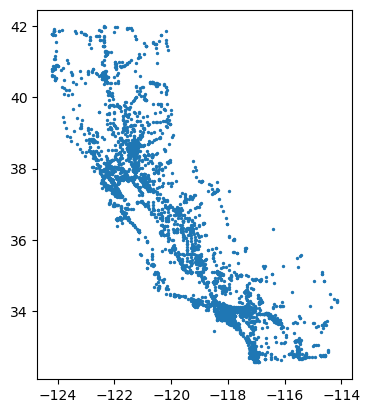

In [5]:
ca_substations.plot(markersize=2)

## SCE ICA - Circuit Segments

In [6]:
# Load data
sce_circuits = gpd.read_file("../../../../capstone/electrigrid/data/utilities/sce_circuits/ICA_-_Circuit_Segments.geojson")

In [7]:
sce_circuits.head()

,download_link_microgrid,changed_date,lgp_flag,most_limiting_factor,circuit_name,section_id,node_id,phase,circuit_voltage,substation_name,...,ica_overall_pv_op_flex,ica_overall_pv,uniform_generation_op_flex,uniform_generation,note,download_link,disclaimer,objectid,Shape__Length,geometry
0,https://Microgrid.sce.com/icafiledownload/mode...,01/08/2024,No,Generation - Steady State Voltage,Agave,207621115,207621030,3,12,Tamarisk,...,Redacted,4.0,Redacted,3.0444,This is a potentially constrained circuit.Load...,https://drpep.sce.com/icafiledownload/models/w...,N,1,10.176215,"LINESTRING (-116.41761 33.80241, -116.41761 33..."
1,https://Microgrid.sce.com/icafiledownload/mode...,01/08/2024,No,Generation - Steady State Voltage,Agave,207621012,207621067,3,12,Tamarisk,...,Redacted,4.0,Redacted,3.0443,This is a potentially constrained circuit.Load...,https://drpep.sce.com/icafiledownload/models/w...,N,2,254.405535,"LINESTRING (-116.41774 33.80196, -116.41775 33..."
2,https://Microgrid.sce.com/icafiledownload/mode...,01/08/2024,No,Generation - Voltage Variation,Agave,237152120,208697053,3,12,Tamarisk,...,Redacted,3.0,Redacted,2.8063,This is a potentially constrained circuit.Load...,https://drpep.sce.com/icafiledownload/models/w...,N,3,15.686419,"LINESTRING (-116.41528 33.80130, -116.41528 33..."
3,https://Microgrid.sce.com/icafiledownload/mode...,01/08/2024,No,NA,Agave,42955164,208697069,3,12,Tamarisk,...,None,NaN,None,NaN,This is a potentially constrained circuit.Load...,https://drpep.sce.com/icafiledownload/models/w...,N,4,353.078139,"LINESTRING (-116.41511 33.80137, -116.41512 33..."
4,https://Microgrid.sce.com/icafiledownload/mode...,01/08/2024,No,Generation - Steady State Voltage,Agave,98220557,208697140,3,12,Tamarisk,...,Redacted,4.0,Redacted,3.0373,This is a potentially constrained circuit.Load...,https://drpep.sce.com/icafiledownload/models/w...,N,5,399.435330,"LINESTRING (-116.41828 33.80154, -116.41782 33..."


In [8]:
# Display columns
sce_circuits.columns

Index(['download_link_microgrid', 'changed_date', 'lgp_flag',
       'most_limiting_factor', 'circuit_name', 'section_id', 'node_id',
       'phase', 'circuit_voltage', 'substation_name', 'substation_voltage',
       'system_name', 'ica_overall_load', 'ica_overall_pv_op_flex',
       'ica_overall_pv', 'uniform_generation_op_flex', 'uniform_generation',
       'note', 'download_link', 'disclaimer', 'objectid', 'Shape__Length',
       'geometry'],
      dtype='object')

In [9]:
# Check CRS
sce_circuits.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [10]:
# Create LA bbox
la_bbox = box(minx= -118.515701, miny = 33.856732, maxx= -117.866135, maxy = 34.227132)
la_bbox = gpd.GeoDataFrame(geometry=[la_bbox], crs = sce_circuits.crs)

In [11]:
# Clip circuits to LA bbox
la_circuits = gpd.clip(sce_circuits, la_bbox)

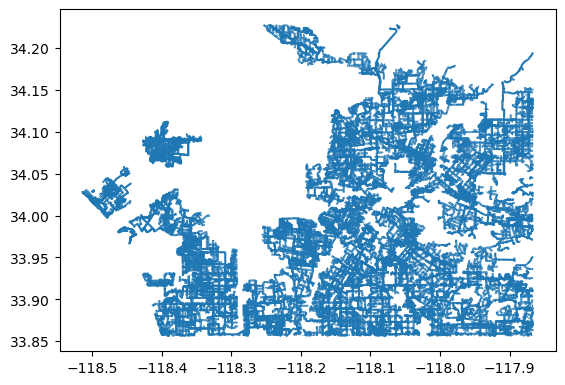

In [12]:
fig, ax = plt.subplots()

la_circuits.plot(ax=ax)
plt.show()

## SCE Distribution Circuits

In [15]:
sce_dist_circuits = gpd.read_file("../../../../capstone/electrigrid/data/utilities/sce_circuits/Distribution_circuits.geojson")

In [16]:
sce_dist_circuits.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [17]:
la_dist_circuits = gpd.clip(sce_dist_circuits, la_bbox)

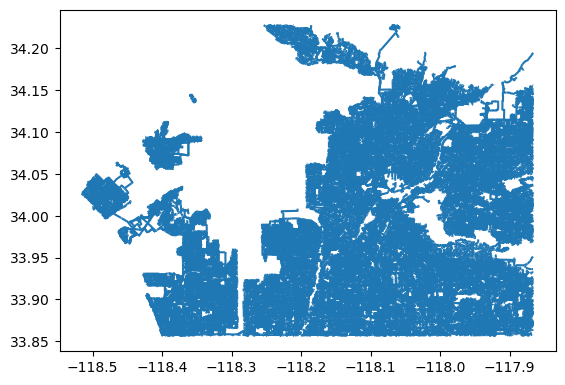

In [18]:
fig, ax = plt.subplots()

la_dist_circuits.plot(ax=ax)
plt.show()

This layer from SCE looks more 'granular' and has more lines than the ICA - Circuit Segments layer, could explain the lack of distribution lines that Yohan pointed out.

## PE&G Circuits

There are multiple shapefiles included from the `GRIP_SHP` zip file. Time is needed to discern which are the ones we will end up using.

In [28]:
# List all shapefiles
for filepath in glob.glob("../../../../capstone/electrigrid/data/utilities/pge_shapefiles/*.shp"):
    print(os.path.basename(filepath))

NetworkedSecondaryBuffer.shp
DERCircuits.shp
ICAEstimatedCapacitySummary.shp
PlannedInvestments_LNBADollarsperUnitperYr.shp
High_Fire_Threat_District.shp
EDSubstations.shp
FeederDetail.shp
DFSubstationArea___PeakFacilityLoadingPercent.shp
DUR_Project_Execution.shp
igp_tline.shp
GNASubstationArea__PeakFacilityDeficiencyPercent.shp
GNACircuitsView.shp
TransmissionLines.shp
LineDetail.shp
ICANotAvailable.shp
DFCircuitsView.shp
SubstationLoadProfile.shp
igp_Substation.shp
GNALineSection.shp
FeederLoadProfile.shp
KnownLoad.shp


### DERCircuits.shp

Distributed Energy Resource circuits and details.

In [29]:
# Load data
pge_der_circuits = gpd.read_file("../../../../capstone/electrigrid/data/utilities/pge_shapefiles/DERCircuits.shp")
pge_der_circuits.head()

,circuitid,circuitnam,subname,aafscoolin,aafscool_1,aafscool_2,aafscool_3,aafscool_4,aafsheatin,aafsheat_1,...,newresid_3,newresid_4,last_updat,photovolta,photovol_1,photovol_2,photovol_3,photovol_4,SHAPE_Leng,geometry
0,012011101,OAKLAND C 1101,OAKLAND C,0.01,0.02,0.02,0.03,0.05,0.00,0.01,...,0.00,0.00,2025-09-12,-0.04,-0.11,-0.16,-0.22,-0.29,4033.818754,"MULTILINESTRING ((564059.182 4184096.280, 5640..."
1,012011102,OAKLAND C 1102,OAKLAND C,0.01,0.02,0.04,0.05,0.06,0.00,0.01,...,0.00,0.00,2025-09-12,-0.05,-0.09,-0.14,-0.21,-0.24,4937.485621,"MULTILINESTRING ((564143.703 4184260.180, 5641..."
2,012011103,OAKLAND C 1103,OAKLAND C,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,...,-99.99,-99.99,2025-09-12,-99.99,-99.99,-99.99,-99.99,-99.99,3925.468328,"MULTILINESTRING ((564081.619 4184244.407, 5640..."
3,012011104,OAKLAND C 1104,OAKLAND C,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,...,-99.99,-99.99,2025-09-12,-99.99,-99.99,-99.99,-99.99,-99.99,4467.524968,"MULTILINESTRING ((564235.877 4184316.718, 5642..."
4,012011105,OAKLAND C 1105,OAKLAND C,0.01,0.04,0.09,0.13,0.18,0.00,0.03,...,0.00,0.00,2025-09-12,-0.08,-0.16,-0.21,-0.24,-0.28,3780.657500,"MULTILINESTRING ((564369.074 4184483.000, 5643..."


In [30]:
# Check CRS
pge_der_circuits.crs

<Projected CRS: EPSG:26910>
Name: NAD83 / UTM zone 10N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: North America - between 126°W and 120°W - onshore and offshore. Canada - British Columbia; Northwest Territories; Yukon. United States (USA) - California; Oregon; Washington.
- bounds: (-126.0, 30.54, -119.99, 81.8)
Coordinate Operation:
- name: UTM zone 10N
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

### ICAEstimatedCapacitySummary.shp

In [5]:
ica = gpd.read_file("../../../../capstone/electrigrid/data/utilities/pge_shapefiles/ICAEstimatedCapacitySummary.shp")
ica.head()

,feederid,globalid,csv_linese,division,loadica,forecastfe,forecastba,loadapplic,plannedpro,freetransf,publish,expectedca,last_updat,SHAPE_Leng,geometry
0,014351107,{87EB2F87-50AB-44A0-9FC4-6E6E24C3535B},4936944,Mission,No,No,Yes,CC,CC,CC,1,No Expected Capacity,2025-06-02,71.875491,"LINESTRING (591617.440 4154025.561, 591546.305..."
1,082191106,{E314C8E4-6A61-4E55-9F75-B2954CF2DADE},4453085,San Jose,Yes,No,Yes,CC,CC,CC,1,No Expected Capacity,2025-06-02,15.947169,"LINESTRING (601134.991 4134501.020, 601121.383..."
2,024011102,{6D4DBD87-0E5F-430C-BBF0-CB2A57B313C8},4234123,Peninsula,Yes,Yes,No,CC,CC,CC,1,No Expected Capacity,2025-06-02,10.386501,"LINESTRING (561837.609 4154928.267, 561829.068..."
3,024181102,{4ACAA0D0-8E64-4EAD-AF69-5BA09B28D626},5096769,Peninsula,Yes,Yes,No,CC,CC,CC,1,No Expected Capacity,2025-06-02,22.735229,"LINESTRING (566909.738 4150753.679, 566926.358..."
4,014502108,{C28C18E0-6820-4AA9-8F35-D361F455C77C},3293963,Mission,Yes,Yes,Yes,CC,CC,CC,1,Engineering Assessment Required,2025-06-02,109.909735,"LINESTRING (597969.574 4168775.104, 598079.484..."


### EDSubstations.shp

Electric distribution substations.

In [32]:
pge_ed_substations = gpd.read_file("../../../../capstone/electrigrid/data/utilities/pge_shapefiles/EDSubstations.shp")
pge_ed_substations.head()

,Substation,Substati_1,Voltage_kV,NUMBANKS,REDACTED,UNGROUNDED,Division,Existing_D,Queued_DG,Total_DG,Publish,Last_Updat,geometry
0,LAMONT,25391,12,2,Yes,None,Kern,18400,28060,46460,1,2025-06-02,POINT (876359.283 3913857.542)
1,POTTER VALLEY P H,04228,12,3,No,None,Humboldt,540,90,630,1,2025-06-02,POINT (488962.642 4356858.433)
2,HIGHWAY,04265,12,2,No,None,North Bay,12855,15529,28384,1,2025-11-20,POINT (565363.608 4224489.060)
3,KING CITY,18203,12,3,No,None,Central Coast,2628,2835,5463,1,2025-11-18,POINT (668370.524 4009649.909)
4,BELLE HAVEN,02402,4.16,5,Yes,None,Peninsula,17400,4760,22160,1,2025-06-02,POINT (573511.216 4148239.891)


### LineDetail.shp

In [15]:
pge_linedetail = gpd.read_file("../../../../capstone/electrigrid/data/utilities/pge_shapefiles/LineDetail.shp")
pge_linedetail.head()

,FeederId,FeederName,globalid,CSV_LineSe,LoadCapaci,voltage_kv,phase_cnt,limiting_m,limiting_c,ICA_Analys,...,limiting_4,limiting_5,limiting_6,limiting_7,limiting_8,ScreenL,Publish,Last_Updat,SHAPE_Leng,geometry
0,062541102,MERIDIAN 1102,{3F991049-BA44-489F-A403-DA79E95B5F6A},3862041,0,12.0,3,None,None,May 2024,...,None,None,None,None,None,Unlikely to pass,1,2025-06-02,145.642120,"LINESTRING (589967.888 4331019.031, 589942.386..."
1,043302102,MONROE 2102,{65E86C65-2474-4DE9-831A-73C5C6C88469},5458148,2380,21.0,3,None,None,Feb 2025,...,None,None,None,None,None,Likely to pass,1,2025-06-02,9.102052,"LINESTRING (522844.005 4259184.830, 522843.962..."
2,063172101,MADISON 2101,{26A0B689-C08B-4AE6-AAC1-341797C5AC4E},3180180,0,21.0,3,None,None,Dec 2024,...,None,None,None,None,None,Unlikely to pass,1,2025-06-02,4.571886,"LINESTRING (585471.148 4283094.456, 585475.668..."
3,162701707,VIERRA 1707,{9B295D61-2151-4336-8039-C935C669DD4D},5317517,420,17.0,3,None,None,May 2025,...,None,None,None,None,None,Unlikely to pass,1,2025-06-02,47.831056,"LINESTRING (654428.591 4180089.591, 654476.421..."
4,254691101,NORCO 1101,{3E99B378-0FDD-4ABD-8D12-6FB6E3E30909},5041662,0,12.0,3,None,None,Apr 2025,...,None,None,None,None,None,Likely to pass,1,2025-06-02,11.245946,"LINESTRING (844197.373 3912463.577, 844197.353..."


### DFCircuitsView.shp

Distribution Feeder circuits and details.

In [16]:
pge_df_circuits_view = gpd.read_file("../../../../capstone/electrigrid/data/utilities/pge_shapefiles/DFCircuitsView.shp")
pge_df_circuits_view.head()

,substation,gnaneedid,division,gnafacilit,bankname,substati_1,facilityra,idnumber,last_updat,facilityty,...,facility_1,facility_2,facility_3,facility_4,peakfacili,publish,circuitid,circuitnam,Shape_Leng,geometry
0,12041,GNA_012041102_Capacity,East Bay,OAKLAND D 1102,OAKLAND D BANK 5,OAKLAND D,7.48,12041102,2025-08-29,FEEDER,...,-99.99,-99.99,-99.99,-99.99,-99.99,1,012041102,OAKLAND D 1102,10124.019833,"MULTILINESTRING ((-13613137.245 4555900.310, -..."
1,01201,GNA_012011101_Capacity,East Bay,OAKLAND C 1101,NETWORK GROUP OAKLAND C 1251,OAKLAND C,9.14,012011101,2025-08-29,FEEDER,...,5.86,5.83,5.80,6.05,66.18,1,012011101,OAKLAND C 1101,5111.350800,"MULTILINESTRING ((-13611295.137 4551493.467, -..."
2,01201,GNA_012011102_Capacity,East Bay,OAKLAND C 1102,NETWORK GROUP OAKLAND C 1251,OAKLAND C,10.27,012011102,2025-08-29,FEEDER,...,2.41,2.39,2.39,2.40,23.71,1,012011102,OAKLAND C 1102,6255.822658,"MULTILINESTRING ((-13611186.650 4551700.744, -..."
3,01201,GNA_012011103_Capacity,East Bay,OAKLAND C 1103,NETWORK GROUP OAKLAND C 1251,OAKLAND C,9.14,012011103,2025-08-29,FEEDER,...,-99.99,-99.99,-99.99,-99.99,-99.99,1,012011103,OAKLAND C 1103,4976.465247,"MULTILINESTRING ((-13611265.308 4551681.330, -..."
4,01201,GNA_012011104_Capacity,East Bay,OAKLAND C 1104,NETWORK GROUP OAKLAND C 1251,OAKLAND C,9.14,012011104,2025-08-29,FEEDER,...,-99.99,-99.99,-99.99,-99.99,-99.99,1,012011104,OAKLAND C 1104,5661.327582,"MULTILINESTRING ((-13611069.543 4551771.621, -..."


### FeederLoadProfile.shp

In [17]:
pge_feeder_load_profile = gpd.read_file("../../../../capstone/electrigrid/data/utilities/pge_shapefiles/FeederLoadProfile.shp")
pge_feeder_load_profile.head()

,OBJECTID,FeederID,MonthHour,division,Low,High,Publish,Last_Updat,geometry
0,1,12232107,12_10,Mission,8168.0,11718.0,1,20250602010025,None
1,2,163451701,05_02,Stockton,1418.0,1576.0,1,20251121081319,None
2,3,163121103,10_23,Stockton,1214.0,2134.0,1,20251121081258,None
3,4,253391104,02_01,Kern,1947.0,2199.0,1,20251121081319,None
4,5,12041134,12_06,East Bay,2193.0,2802.0,1,20251121081320,None


Every single geometry in this is blank, unsure about this, will need to check metadata.

---

There are also xml files included, likely containing metadata, that also need to be investigated.

In [2]:
for filepath in glob.glob("../../../../capstone/electrigrid/data/utilities/pge_shapefiles/*.xml"):
    print(os.path.basename(filepath))

ICAEstimatedCapacitySummary.shp.xml
GNACircuitsView.shp.xml
GNASubstationArea__PeakFacilityDeficiencyPercent.shp.xml
NetworkedSecondaryBuffer.shp.xml
DERCircuits.shp.xml
DFSubstationArea___PeakFacilityLoadingPercent.shp.xml
DUR_Project_Execution.shp.xml
EDSubstations.shp.xml
KnownLoad.shp.xml
TransmissionLines.shp.xml
LineDetail.shp.xml
SubstationLoadProfile.shp.xml
FeederDetail.shp.xml
ICANotAvailable.shp.xml
FeederLoadProfile.shp.xml
PlannedInvestments_LNBADollarsperUnitperYr.shp.xml
DFCircuitsView.shp.xml
GNALineSection.shp.xml


In [3]:
gna_substation = pd.read_xml("../../../../capstone/electrigrid/data/utilities/pge_shapefiles/GNASubstationArea__PeakFacilityDeficiencyPercent.shp.xml")
gna_substation

,CreaDate,CreaTime,ArcGISFormat,SyncOnce,DataProperties,SyncDate,SyncTime,ModDate,ModTime,envirDesc,...,distFormat,distTranOps,ScopeCd,Sync,mdHrLvName,RefSystem,VectSpatRep,ptvctinf,detailed,mdDateSt
0,20250912.0,18384000.0,1.0,False,NaN,20250912.0,18565200.0,20250912.0,18565200.0,None,...,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Microsoft Windows Server 2016 Technical Previe...,...,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,...,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,...,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,...,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,...,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,...,NaN,NaN,NaN,True,dataset,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,...,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,...,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,...,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN


Investigating ICA data directly by downloading the specific ICA, Load Capacity (kW) layer, instead of bulk, shapefile download.

In [10]:
ica_lc = gpd.read_file("../../../../capstone/electrigrid/data/utilities/ica_lc.gdb")
ica_lc.head()

,FeederId,FeederName,globalid,CSV_LineSection,LoadCapacity_kW,voltage_kv,phase_cnt,limiting_month_hour,limiting_criteria,ICA_Analysis_Date,...,limiting_month_hour_noof,limiting_criteria_pvof,limiting_month_hour_pvof,limiting_criteria_pvnoof,limiting_month_hour_pvnoof,ScreenL,Publish,Last_Update_On_Map,SHAPE_Length,geometry
0,062541102,MERIDIAN 1102,{3F991049-BA44-489F-A403-DA79E95B5F6A},3862041,0.0,12.0,3.0,None,None,May 2024,...,None,None,None,None,None,Unlikely to pass,1.0,2025-06-02 08:06:55+00:00,187.698415,"MULTILINESTRING ((-13576438.420 4739406.184, -..."
1,043302102,MONROE 2102,{65E86C65-2474-4DE9-831A-73C5C6C88469},5458148,2380.0,21.0,3.0,None,None,Feb 2025,...,None,None,None,None,None,Likely to pass,1.0,2025-06-02 08:06:55+00:00,11.640844,"MULTILINESTRING ((-13663143.293 4647558.249, -..."
2,063172101,MADISON 2101,{26A0B689-C08B-4AE6-AAC1-341797C5AC4E},3180180,0.0,21.0,3.0,None,None,Dec 2024,...,None,None,None,None,None,Unlikely to pass,1.0,2025-06-02 08:05:50+00:00,5.852230,"MULTILINESTRING ((-13582893.368 4677698.025, -..."
3,162701707,VIERRA 1707,{9B295D61-2151-4336-8039-C935C669DD4D},5317517,420.0,17.0,3.0,None,None,May 2025,...,None,None,None,None,None,Unlikely to pass,1.0,2025-06-02 08:06:31+00:00,60.427545,"MULTILINESTRING ((-13497151.509 4544887.136, -..."
4,254691101,NORCO 1101,{3E99B378-0FDD-4ABD-8D12-6FB6E3E30909},5041662,0.0,12.0,3.0,None,None,Apr 2025,...,None,None,None,None,None,Likely to pass,1.0,2025-06-02 08:06:55+00:00,13.773830,"MULTILINESTRING ((-13270984.826 4204205.060, -..."


In [11]:
ica_lc.columns

Index(['FeederId', 'FeederName', 'globalid', 'CSV_LineSection',
       'LoadCapacity_kW', 'voltage_kv', 'phase_cnt', 'limiting_month_hour',
       'limiting_criteria', 'ICA_Analysis_Date', 'lica_analysis_date',
       'Division', 'GenCapacity_kW', 'GenericPVCapacity_kW',
       'GenCapacity_no_OpFlex_kW', 'GenericCapacity_no_OpFlex_kW',
       'limiting_criteria_of', 'limiting_month_hour_of',
       'limiting_criteria_noof', 'limiting_month_hour_noof',
       'limiting_criteria_pvof', 'limiting_month_hour_pvof',
       'limiting_criteria_pvnoof', 'limiting_month_hour_pvnoof', 'ScreenL',
       'Publish', 'Last_Update_On_Map', 'SHAPE_Length', 'geometry'],
      dtype='object')

## Combined SCE Circuits with Census Tracts

Focusing on only SCE utility data for now, will try combining the ICA circuit segments with CA census tracts.

In [18]:
ca_census = gpd.read_file("../../../../capstone/electrigrid/data/census/tl_2025_06_tract/tl_2025_06_tract.shp")

In [19]:
ca_census.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,GEOIDFQ,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,06,065,042516,06065042516,1400000US06065042516,425.16,Census Tract 425.16,G5020,S,973130,0,+33.9227363,-117.2393879,"POLYGON ((-117.24375 33.92818, -117.24323 33.9..."
1,06,065,042716,06065042716,1400000US06065042716,427.16,Census Tract 427.16,G5020,S,2698784,711913,+33.6865062,-117.2551285,"POLYGON ((-117.27209 33.68473, -117.27117 33.6..."
2,06,065,042717,06065042717,1400000US06065042717,427.17,Census Tract 427.17,G5020,S,6425166,145210,+33.6997108,-117.2534257,"POLYGON ((-117.26908 33.70438, -117.26882 33.7..."
3,06,065,042902,06065042902,1400000US06065042902,429.02,Census Tract 429.02,G5020,S,43393952,0,+33.7493422,-117.3068291,"POLYGON ((-117.34733 33.78247, -117.34731 33.7..."
4,06,065,042903,06065042903,1400000US06065042903,429.03,Census Tract 429.03,G5020,S,44642454,0,+33.8027798,-117.3133054,"POLYGON ((-117.36332 33.82940, -117.36331 33.8..."


In [20]:
ca_census.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

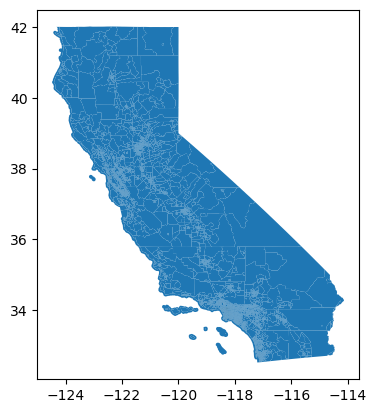

In [21]:
# Initial census tract plot
fig, ax = plt.subplots()

ca_census.plot(ax=ax)

plt.show()

In [22]:
la_bbox = la_bbox.to_crs("EPSG:4269")
la_census = gpd.clip(ca_census, la_bbox)

In [27]:
la_circuits.columns

Index(['download_link_microgrid', 'changed_date', 'lgp_flag',
       'most_limiting_factor', 'circuit_name', 'section_id', 'node_id',
       'phase', 'circuit_voltage', 'substation_name', 'substation_voltage',
       'system_name', 'ica_overall_load', 'ica_overall_pv_op_flex',
       'ica_overall_pv', 'uniform_generation_op_flex', 'uniform_generation',
       'note', 'download_link', 'disclaimer', 'objectid', 'Shape__Length',
       'geometry'],
      dtype='object')

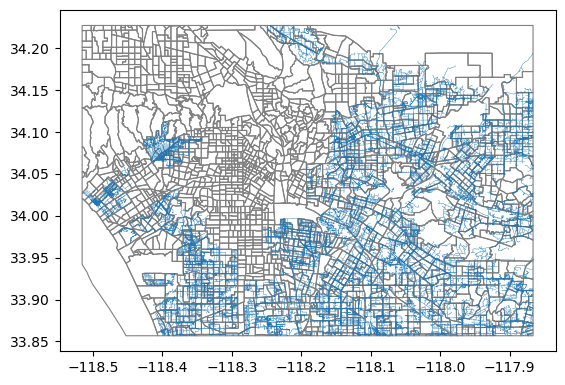

In [41]:
fig, ax = plt.subplots()

la_census.boundary.plot(ax=ax, edgecolor='gray', linewidth=0.8)
la_circuits.plot(ax=ax, linewidth=0.3)

plt.show()